# CESM 1.2.1 B1850CN Test on `tigercpu`
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [1]:
!date

Mon Jan 22 14:21:54 EST 2018


In [2]:
%matplotlib notebook

### Data

In [3]:
data_name = 'TS'
nclist = [
    {'tag': 'intel-mpi_520PE',
    'ncfile': '/scratch/gpfs2/wenchang/cesm1_2_1/test_B1850CN_f05g16FLORish_tigercpu_intel/run/test_B1850CN_f05g16FLORish_tigercpu_intel.cam.h.monthly.????-??.nc'},
    {'tag': 'intel_openmpi_520PE',
    'ncfile': '/scratch/gpfs2/wenchang/cesm1_2_1/test_B1850CN_f05g16FLORish_tigercpu_intel_openmpiNetCDF/run/test_B1850CN_f05g16FLORish_tigercpu_intel_openmpiNetCDF.cam.h.monthly.????-??.nc'},
    {'tag': 'gnu_520PE',
    'ncfile': '/scratch/gpfs2/wenchang/cesm1_2_1/test_gnu_B1850CN_f05g16FLORish_tigercpu/run/test_gnu_B1850CN_f05g16FLORish_tigercpu.cam.h.monthly.????-??.nc'},
    {'tag': 'intel-mpi_1280PE',
    'ncfile': '/scratch/gpfs2/wenchang/cesm1_2_1/test_1280pes_B1850CN_f05g16FLORish_tigercpu/run/test_1280pes_B1850CN_f05g16FLORish_tigercpu.cam.h.monthly.????-??.nc'},
    {'tag': 'intel-mpi_640PE',
    'ncfile': '/scratch/gpfs2/wenchang/cesm1_2_1/test_640pes_B1850CN_f05g16FLORish_tigercpu/run/test_640pes_B1850CN_f05g16FLORish_tigercpu.cam.h.monthly.????-??.nc'}
]

In [4]:
dss = dict()# key is tag, value is xr.Dataset
for nc in nclist:
    tag = nc['tag']
    ncfile = nc['ncfile']
    ds = xr.open_mfdataset(ncfile)
    ds['time'] = [datetime.datetime(*t.replace(year=t.year+1850-1).timetuple()[0:6]) for t in ds['time'].values]
    dss[tag] = ds

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [5]:
tss = dict() # key is tag, value is xr.DataArray
for tag,ds in dss.items():
    ts = ds[data_name].geo.fldmean().load()
    tss[tag] = ts

### Plot

<IPython.core.display.Javascript object>


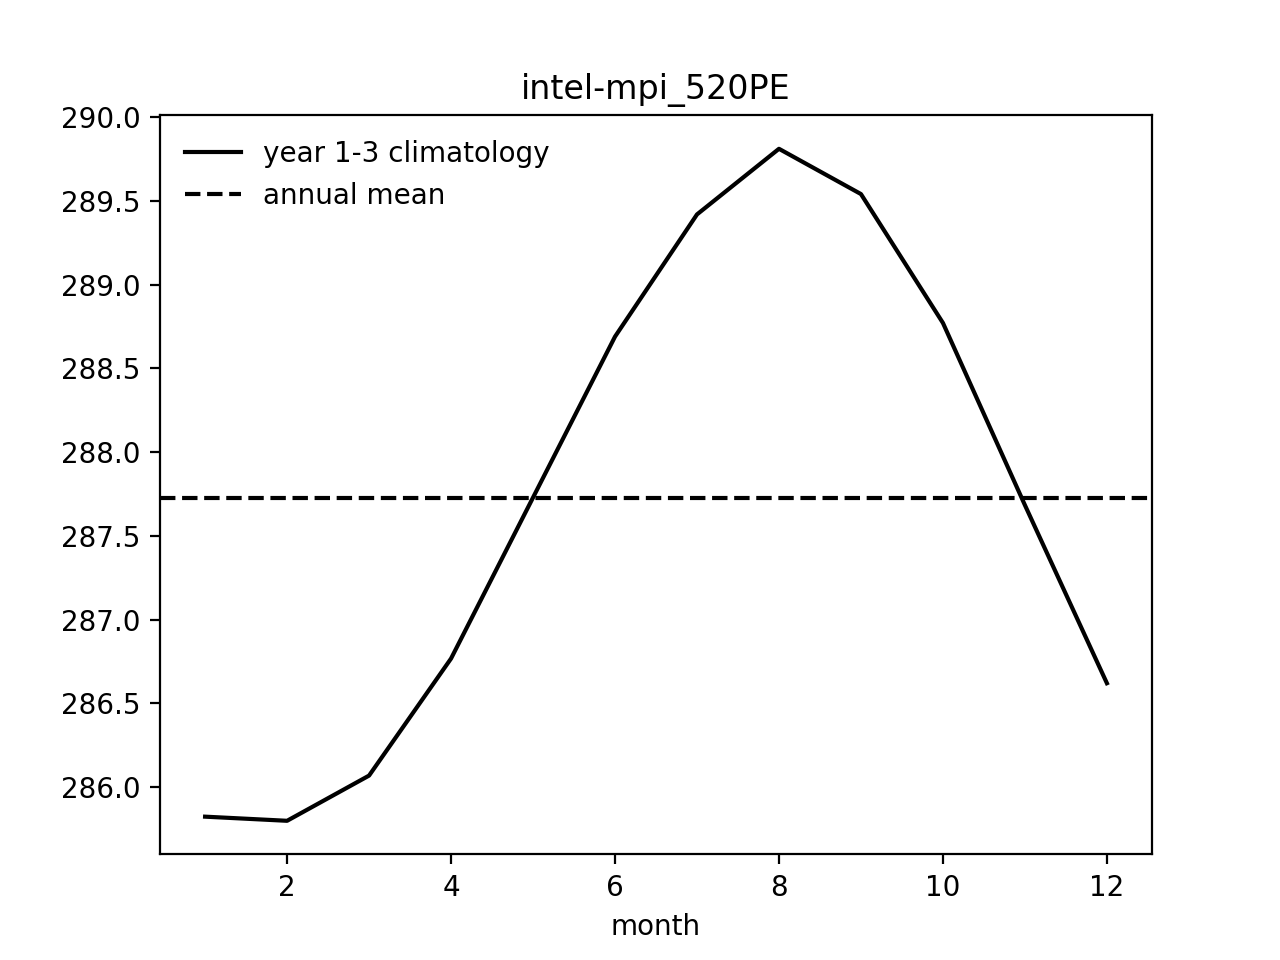

Text(0.5,1,'intel-mpi_520PE')

In [8]:
tag_clim = nclist[0]['tag']
ts_clim = tss[nclist[0]['tag']].sel(time=slice('1850', '1852')).groupby('time.month').mean('time')
ts_clim.plot(color='k', label='year 1-3 climatology')
plt.axhline(ts_clim.mean(), color='k', ls='--', label='annual mean')
plt.legend()
plt.title(tag_clim)

<IPython.core.display.Javascript object>


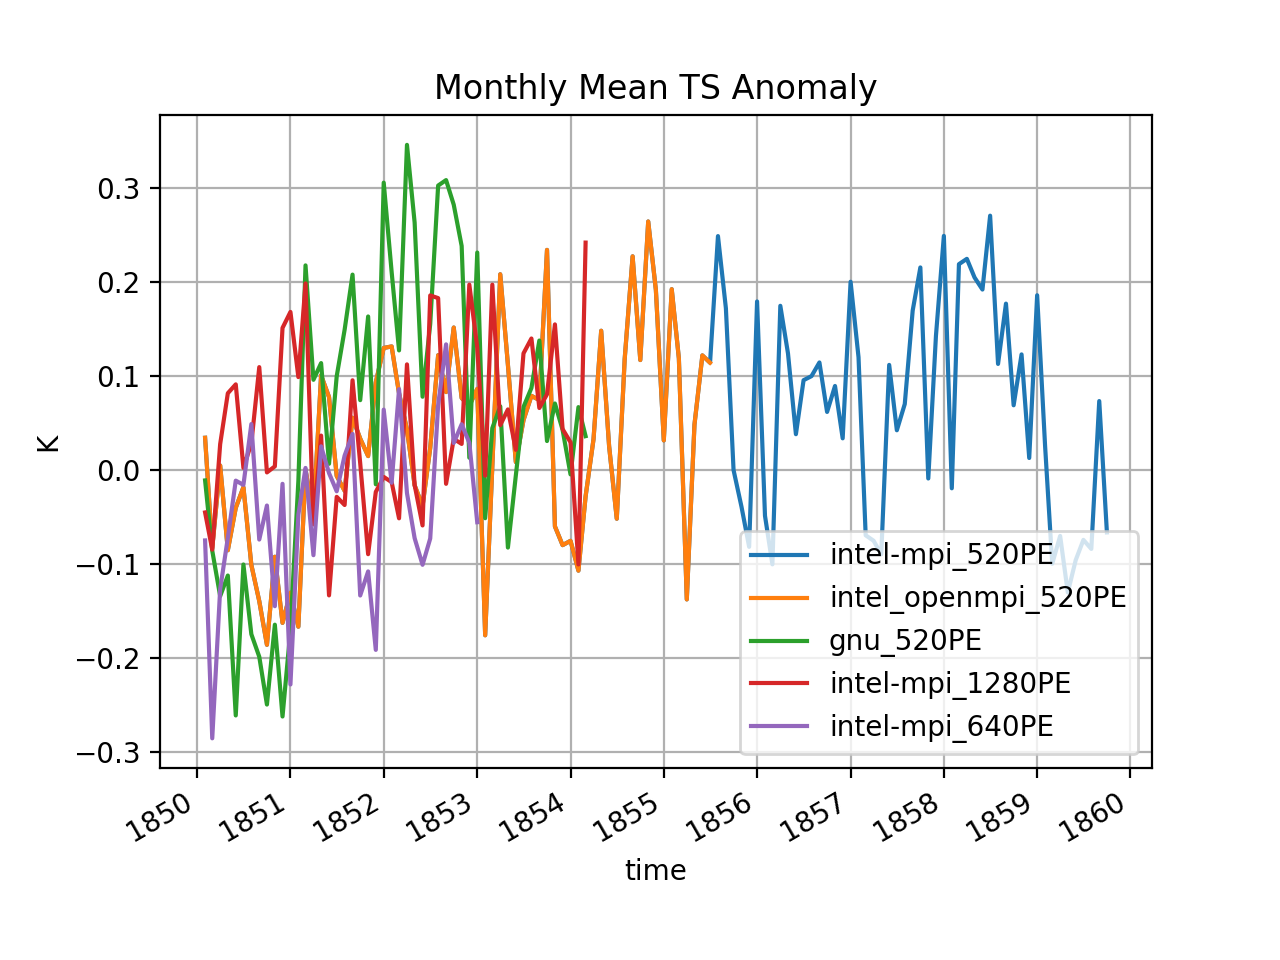

Text(0,0.5,'K')

In [9]:
for nc in nclist:
    tag = nc['tag']
    ts = tss[tag]
    (ts.groupby('time.month') - ts_clim).plot(label=tag)
plt.legend(frameon=True)
plt.grid(True)
plt.title('Monthly Mean TS Anomaly')
plt.ylabel('K')